In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('../Datasets/epi_r.csv')

In [3]:
raw_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#data exploration / feature engineering
raw_data.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=680)

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


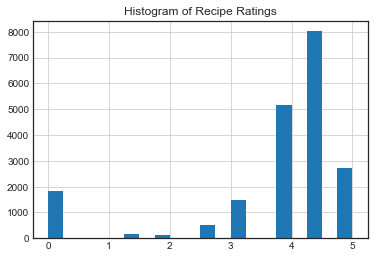

In [7]:
#25% is higher than the mean, means there may be outliers
sns.set_style('white')
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [8]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [9]:
features = raw_data.loc[:, ~(raw_data.columns).isin(['calories', 'protein', 'fat', 'sodium'])]
features.head()

,title,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 676 entries, title to turkey
dtypes: float64(675), object(1)
memory usage: 103.3+ MB


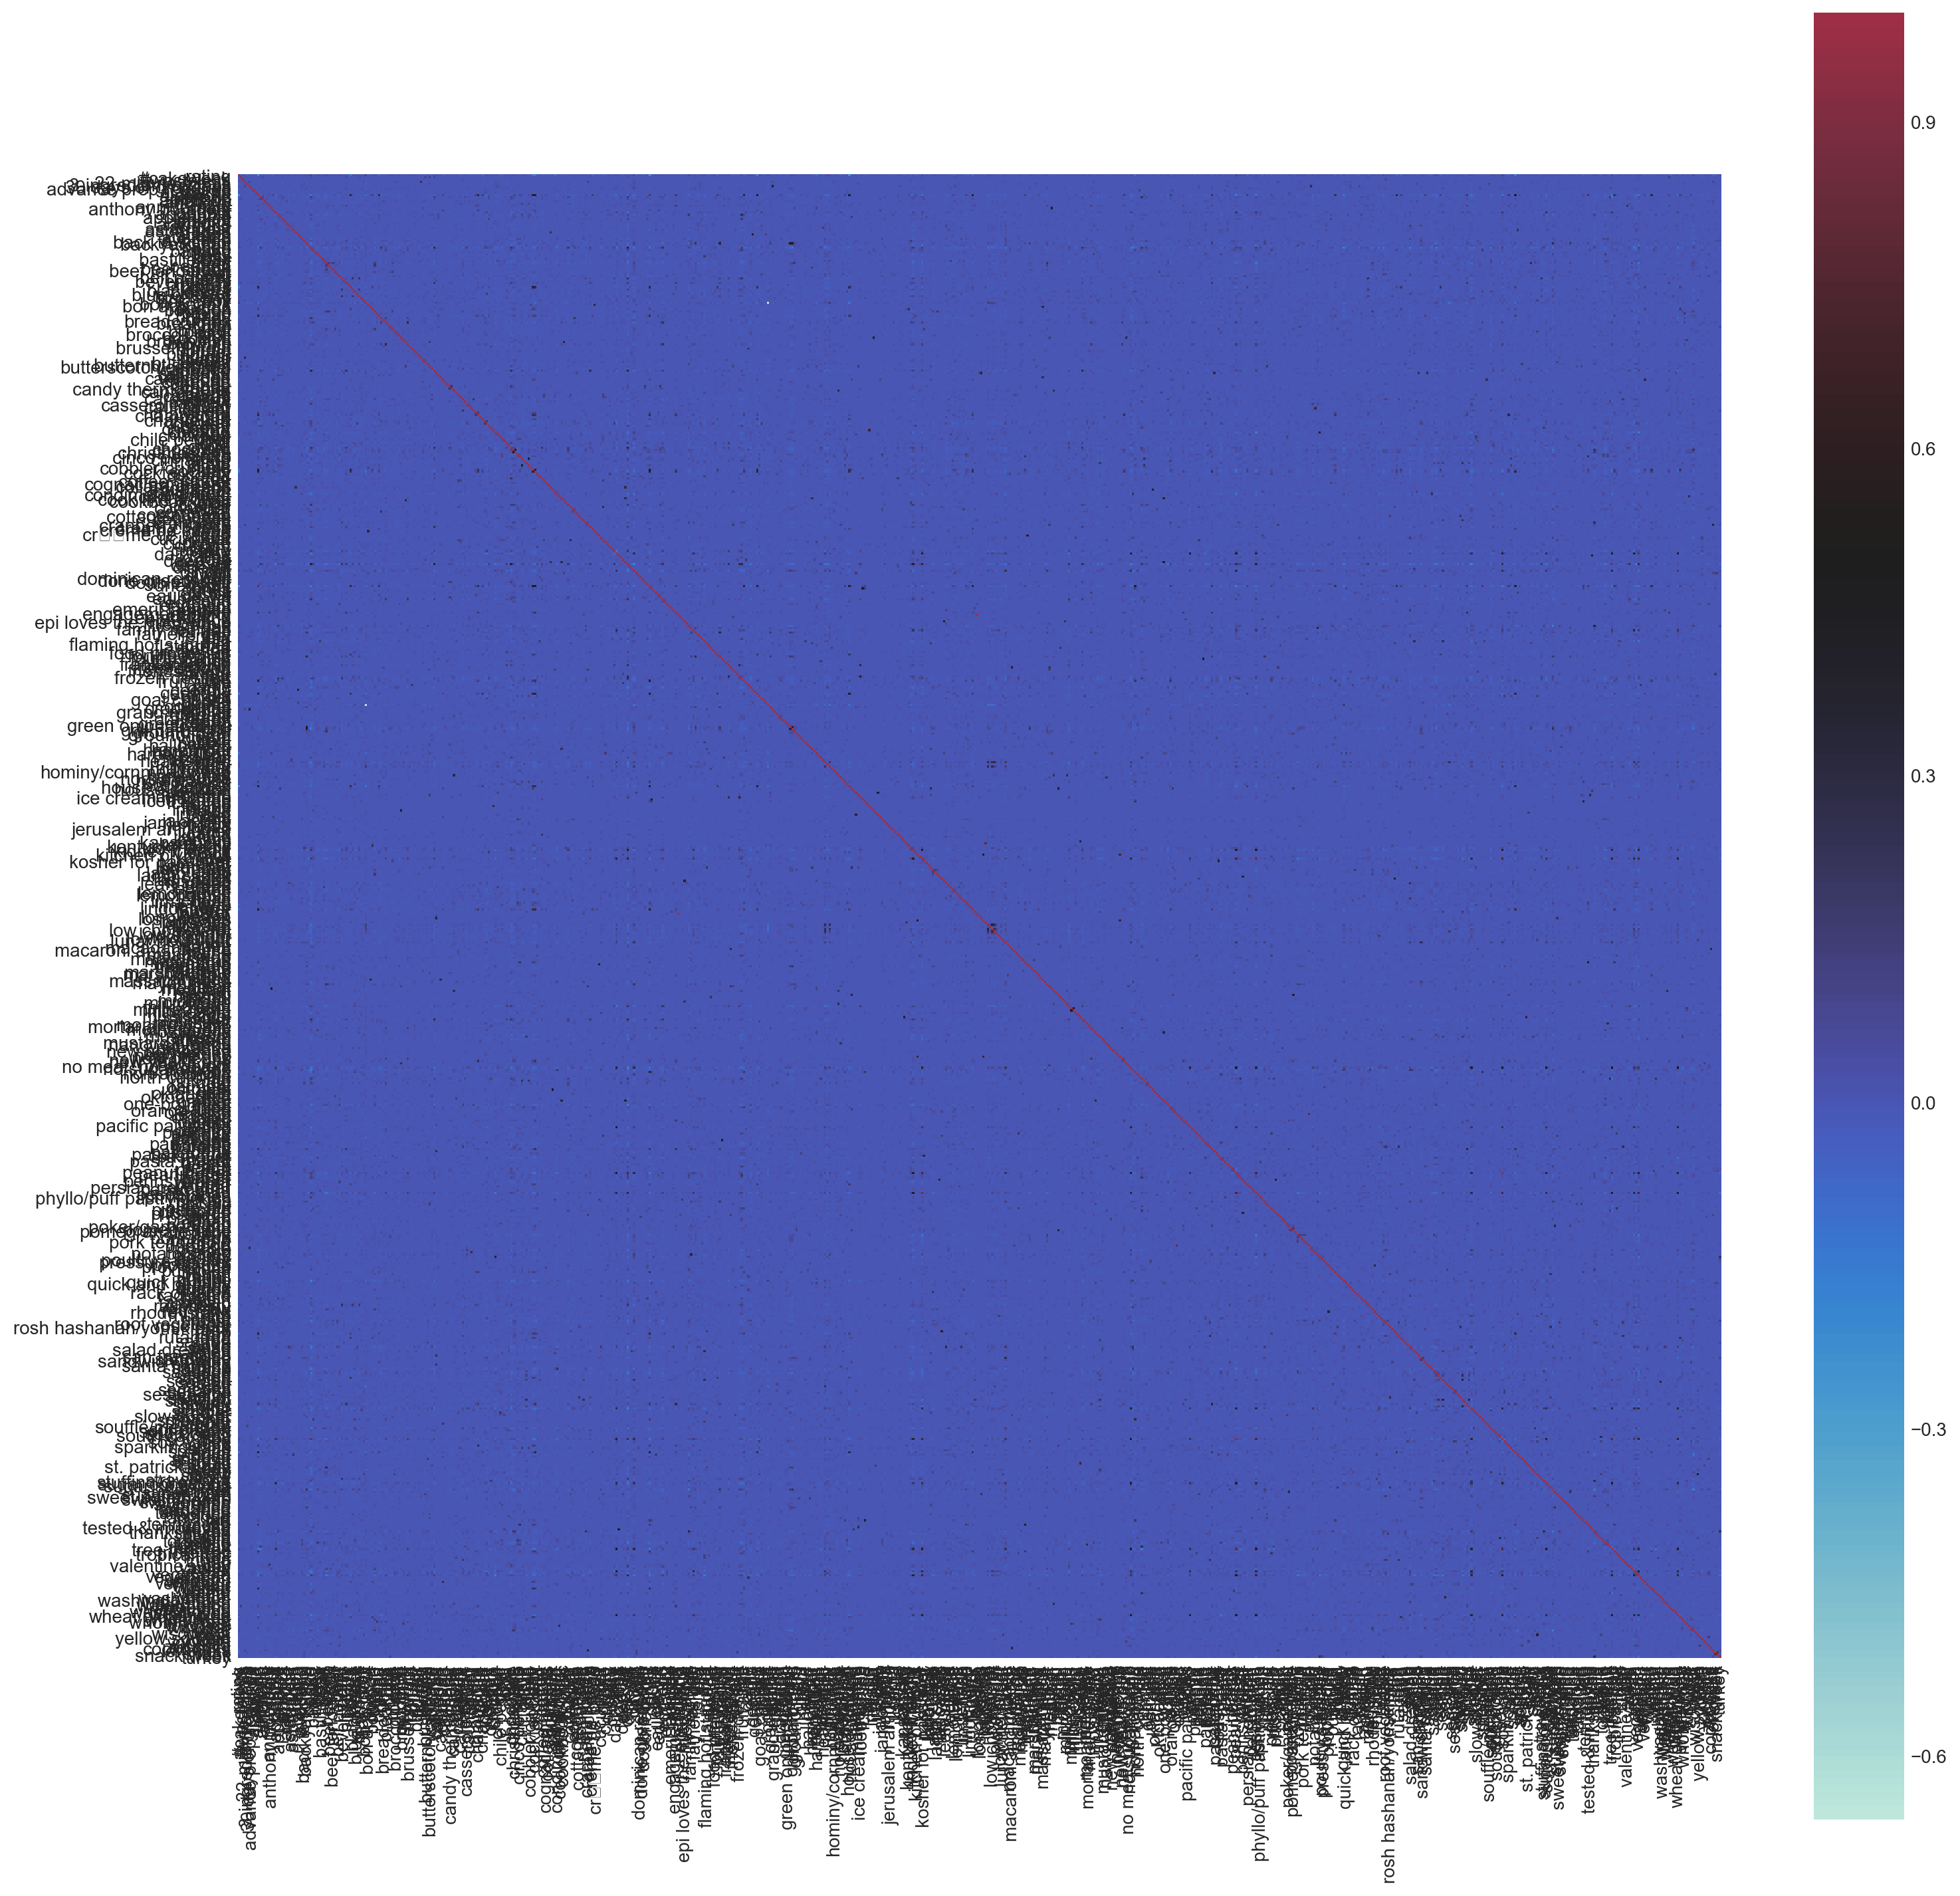

In [11]:
g = plt.figure(dpi=200, figsize=(18,18))
g = sns.heatmap(features.corr(), xticklabels=True, yticklabels=True, square=True, center=0.5)

In [12]:
#count % of zeros
(features[features == 0].count()/features.count()).sort_values().head(32)

title                0.000000
rating               0.091562
bon appétit          0.533463
peanut free          0.581588
soy free             0.596649
tree nut free        0.648713
vegetarian           0.658588
gourmet              0.668462
kosher               0.692051
pescatarian          0.698683
quick & easy         0.732097
wheat/gluten-free    0.755336
bake                 0.779922
summer               0.792988
dessert              0.821813
dairy free           0.840116
side                 0.842859
no sugar added       0.843806
winter               0.845452
fall                 0.849641
dinner               0.865101
sugar conscious      0.877020
healthy              0.882755
kidney friendly      0.884650
onion                0.888390
tomato               0.893277
vegetable            0.895921
sauté                0.898065
milk/cream           0.900509
fruit                0.902354
vegan                0.907690
kid-friendly         0.910682
dtype: float64

In [13]:
features = features[['title', 'rating', 'bon appétit', 'peanut free', 'soy free', 'tree nut free', 'vegetarian', 'gourmet', 'kosher', 'pescatarian', 'quick & easy', 'wheat/gluten-free', 'bake', 'summer', 'dessert', 'dairy free', 'side', 'no sugar added', 'winter', 'fall', 'dinner', 'sugar conscious', 'healthy', 'kidney friendly', 'onion', 'tomato', 'vegetable', 'sauté', 'milk/cream', 'fruit', 'vegan', 'kid-friendly']]

In [14]:
features.head()

,title,rating,bon appétit,peanut free,soy free,tree nut free,vegetarian,gourmet,kosher,pescatarian,...,healthy,kidney friendly,onion,tomato,vegetable,sauté,milk/cream,fruit,vegan,kid-friendly
0,"Lentil, Apple, and Turkey Wrap",2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


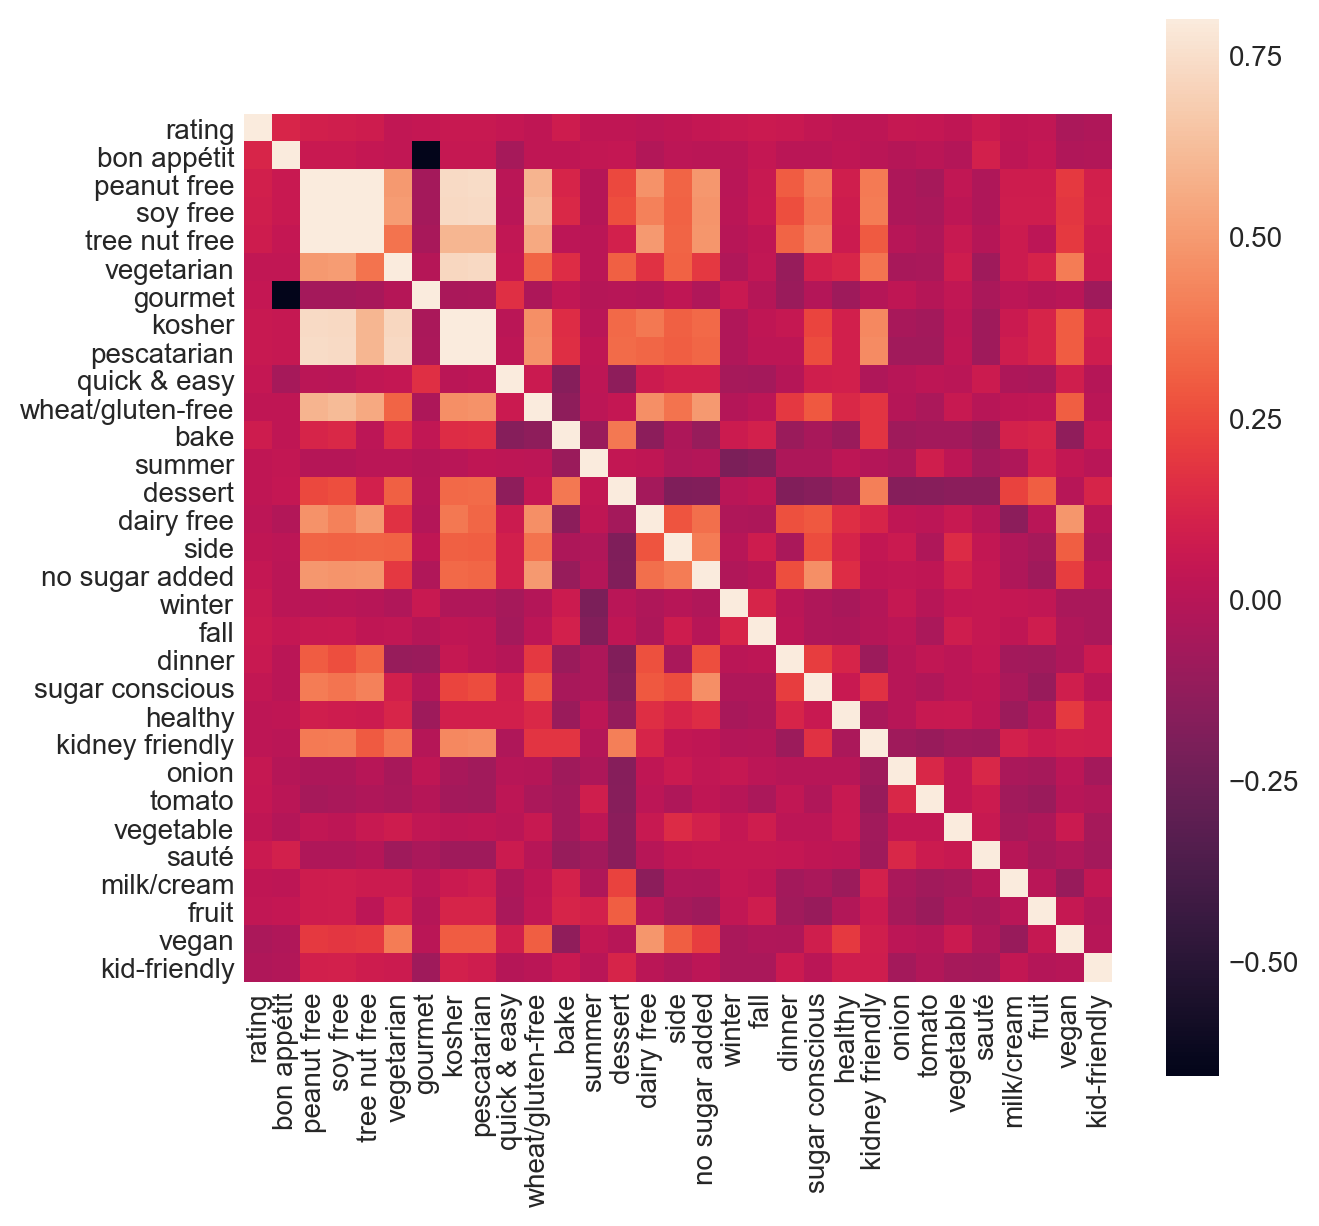

In [15]:
g = plt.figure(dpi=200, figsize=(7,7))
sns.heatmap(features.corr(), xticklabels=True, yticklabels=True, square=True, vmax=.8)

In [16]:
features['peanut/soy/tree nut free'] = np.where(features[['peanut free', 'soy free', 'tree nut free']].sum(axis=1) > 0, 1, 0)
features['kosher/pescatarian'] = np.where(features[['kosher', 'pescatarian']].sum(axis=1) > 0, 1, 0)
features.drop(['peanut free', 'soy free', 'tree nut free', 'kosher', 'pescatarian'], 1, inplace=True)

In [17]:
features.head()

,title,rating,bon appétit,vegetarian,gourmet,quick & easy,wheat/gluten-free,bake,summer,dessert,...,onion,tomato,vegetable,sauté,milk/cream,fruit,vegan,kid-friendly,peanut/soy/tree nut free,kosher/pescatarian
0,"Lentil, Apple, and Turkey Wrap",2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Potato and Fennel Soup Hodge,3.750,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1
4,Spinach Noodle Casserole,3.125,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0


In [18]:
rating = features
rating.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [19]:
# use mean of rating to determine good/bad rating
rating['rating'] = np.where(rating['rating'] > 3.71, 1, 0)

In [20]:
rating.head()

,title,rating,bon appétit,vegetarian,gourmet,quick & easy,wheat/gluten-free,bake,summer,dessert,...,onion,tomato,vegetable,sauté,milk/cream,fruit,vegan,kid-friendly,peanut/soy/tree nut free,kosher/pescatarian
0,"Lentil, Apple, and Turkey Wrap",0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0
1,Boudin Blanc Terrine with Red Onion Confit,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,Potato and Fennel Soup Hodge,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
3,Mahi-Mahi in Tomato Olive Sauce,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1
4,Spinach Noodle Casserole,0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0


In [21]:
y = rating.rating
X = rating.loc[:, ~rating.columns.isin(['title', 'rating'])]

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [22]:
# mport Bernoulli
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

#fit model to data
bnb.fit(X_train, y_train)

#classify, store results in variable
y_pred = bnb.predict(X_test)

#display
print("number of mislabeled points out of total {} points: {}; {:.2f}% accurate".format(
    X_test.shape[0], (y_test != y_pred).sum(), ((1-y_test != y_pred).sum()/X_test.shape[0] * 100)
))

number of mislabeled points out of total 2006 points: 448; 77.67% accurate
